In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2024-03-19 17:11:22.232903: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 17:11:22.269118: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 17:11:22.269155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 17:11:22.270262: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 17:11:22.276646: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 17:11:22.277565: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data = pd.read_csv('/workspaces/AITemplate/Kaggle/EEG_Eye/Data/EEG_Eye_State_Classification.csv')
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


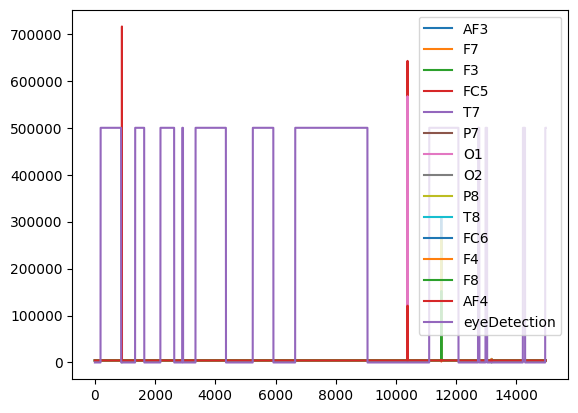

In [94]:
#Graph the data
plt.plot(data['AF3'], label = "AF3")
plt.plot(data['F7'], label = "F7")
plt.plot(data['F3'], label = "F3")
plt.plot(data['FC5'], label = "FC5")
plt.plot(data['T7'], label = "T7")
plt.plot(data['P7'], label = "P7")
plt.plot(data['O1'], label = "O1")
plt.plot(data['O2'], label = "O2")
plt.plot(data['P8'], label = "P8")
plt.plot(data['T8'], label = "T8")
plt.plot(data['FC6'], label = "FC6")
plt.plot(data['F4'], label = "F4")
plt.plot(data['F8'], label = "F8")
plt.plot(data['AF4'], label = "AF4")
plt.plot(data['eyeDetection']*500000, label = "eyeDetection")
plt.legend()
plt.show()

In [95]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [3]:
#Drop the row with max value
def max_drop(name):
    return data.drop(data[data[name] >= 6000.0].index)
    
data = max_drop('AF3')
data = max_drop('F7')
data = max_drop('F3')
data = max_drop('FC5')
data = max_drop('T7')
data = max_drop('P7')
data = max_drop('O1')
data = max_drop('O2')
data = max_drop('P8')
data = max_drop('T8')
data = max_drop('FC6')
data = max_drop('F4')
data = max_drop('F8')
data = max_drop('AF4')

data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,4301.378607,4009.507626,4264.083569,4122.377696,4341.561287,4620.060675,4072.823013,4615.788517,4201.341742,4231.202968,4202.150055,4279.089914,4606.009665,4361.304558,0.448851
std,37.770271,30.087356,21.335365,20.929477,17.007343,18.517252,20.910175,18.341333,17.841047,19.765889,24.475270,20.093956,33.405176,38.472996,0.497394
min,4197.950000,3905.640000,4197.440000,4058.460000,4304.620000,4566.150000,4026.150000,4567.180000,4147.690000,4152.820000,4100.000000,4201.030000,4443.080000,4205.640000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,4504.100000,4156.920000,4386.150000,4250.260000,4463.590000,4756.920000,4178.460000,4731.790000,4320.000000,4362.560000,4332.310000,4397.950000,4833.850000,4573.330000,1.000000


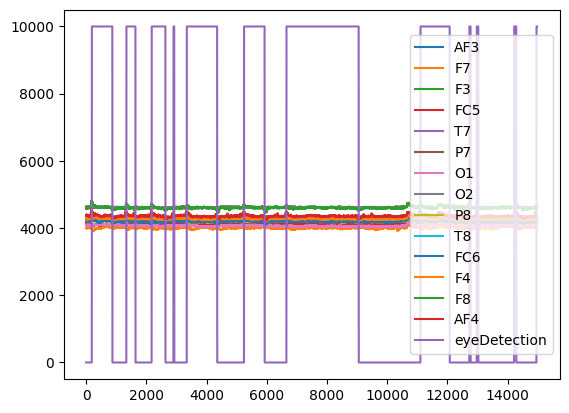

In [4]:
#Graph the data
plt.plot(data['AF3'], label = "AF3")
plt.plot(data['F7'], label = "F7")
plt.plot(data['F3'], label = "F3")
plt.plot(data['FC5'], label = "FC5")
plt.plot(data['T7'], label = "T7")
plt.plot(data['P7'], label = "P7")
plt.plot(data['O1'], label = "O1")
plt.plot(data['O2'], label = "O2")
plt.plot(data['P8'], label = "P8")
plt.plot(data['T8'], label = "T8")
plt.plot(data['FC6'], label = "FC6")
plt.plot(data['F4'], label = "F4")
plt.plot(data['F8'], label = "F8")
plt.plot(data['AF4'], label = "AF4")
plt.plot(data['eyeDetection']*10000, label = "eyeDetection")
plt.legend()
plt.show()

In [5]:
data["AF3"] = data["AF3"]-data["AF3"].mean()
data["F7"] = data["F7"]-data["F7"].mean()
data["F3"] = data["F3"]-data["F3"].mean()
data["FC5"] = data["FC5"]-data["FC5"].mean()
data["T7"] = data["T7"]-data["T7"].mean()
data["P7"] = data["P7"]-data["P7"].mean()
data["O1"] = data["O1"]-data["O1"].mean()
data["O2"] = data["O2"]-data["O2"].mean()
data["P8"] = data["P8"]-data["P8"].mean()
data["T8"] = data["T8"]-data["T8"].mean()
data["FC6"] = data["FC6"]-data["FC6"].mean()
data["F4"] = data["F4"]-data["F4"].mean()
data["F8"] = data["F8"]-data["F8"].mean()
data["AF4"] = data["AF4"]-data["AF4"].mean()

data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,14976.000000
mean,1.761174e-13,-2.288312e-13,-1.943365e-15,-7.846335e-14,-2.856746e-13,1.734453e-13,6.473834e-14,4.047057e-13,5.593247e-13,-2.593177e-13,2.115838e-13,-3.658384e-13,3.947460e-13,-8.210716e-14,0.448851
std,3.777027e+01,3.008736e+01,2.133537e+01,2.092948e+01,1.700734e+01,1.851725e+01,2.091017e+01,1.834133e+01,1.784105e+01,1.976589e+01,2.447527e+01,2.009396e+01,3.340518e+01,3.847300e+01,0.497394
min,-1.034286e+02,-1.038676e+02,-6.664357e+01,-6.391770e+01,-3.694129e+01,-5.391068e+01,-4.667301e+01,-4.860852e+01,-5.365174e+01,-7.838297e+01,-1.021501e+02,-7.805991e+01,-1.629297e+02,-1.556646e+02,0.000000
25%,-2.086861e+01,-1.873763e+01,-1.382357e+01,-1.416770e+01,-9.771287e+00,-8.270675e+00,-1.487301e+01,-1.116852e+01,-1.057174e+01,-1.069297e+01,-1.189006e+01,-1.139991e+01,-1.523967e+01,-1.925456e+01,0.000000
50%,-7.018607e+00,-3.867626e+00,-1.523569e+00,-1.867696e+00,-2.591287e+00,-2.110675e+00,-2.563013e+00,-2.458517e+00,-1.851742e+00,-1.972968e+00,-1.640055e+00,-2.169914e+00,-2.929665e+00,-6.434558e+00,0.000000
75%,1.041139e+01,1.357237e+01,6.686431e+00,9.932304e+00,5.618713e+00,6.609325e+00,1.076699e+01,8.311483e+00,7.888258e+00,8.287032e+00,9.129945e+00,8.090086e+00,1.143033e+01,1.151544e+01,1.000000
max,2.027214e+02,1.474124e+02,1.220664e+02,1.278823e+02,1.220287e+02,1.368593e+02,1.056370e+02,1.160015e+02,1.186583e+02,1.313570e+02,1.301599e+02,1.188601e+02,2.278403e+02,2.120254e+02,1.000000


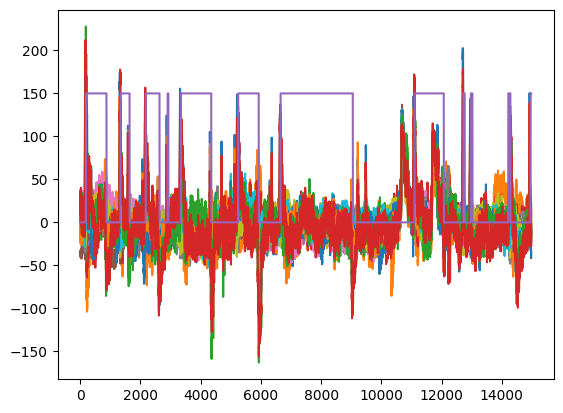

In [6]:
#Graph the data
plt.plot(data['AF3'], label = "AF3")
plt.plot(data['F7'], label = "F7")
plt.plot(data['F3'], label = "F3")
plt.plot(data['FC5'], label = "FC5")
plt.plot(data['T7'], label = "T7")
plt.plot(data['P7'], label = "P7")
plt.plot(data['O1'], label = "O1")
plt.plot(data['O2'], label = "O2")
plt.plot(data['P8'], label = "P8")
plt.plot(data['T8'], label = "T8")
plt.plot(data['FC6'], label = "FC6")
plt.plot(data['F4'], label = "F4")
plt.plot(data['F8'], label = "F8")
plt.plot(data['AF4'], label = "AF4")
plt.plot(data['eyeDetection']*150, label = "eyeDetection")
#plt.legend()
plt.show()

In [7]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,1.497600e+04,14976.000000
mean,1.761174e-13,-2.288312e-13,-1.943365e-15,-7.846335e-14,-2.856746e-13,1.734453e-13,6.473834e-14,4.047057e-13,5.593247e-13,-2.593177e-13,2.115838e-13,-3.658384e-13,3.947460e-13,-8.210716e-14,0.448851
std,3.777027e+01,3.008736e+01,2.133537e+01,2.092948e+01,1.700734e+01,1.851725e+01,2.091017e+01,1.834133e+01,1.784105e+01,1.976589e+01,2.447527e+01,2.009396e+01,3.340518e+01,3.847300e+01,0.497394
min,-1.034286e+02,-1.038676e+02,-6.664357e+01,-6.391770e+01,-3.694129e+01,-5.391068e+01,-4.667301e+01,-4.860852e+01,-5.365174e+01,-7.838297e+01,-1.021501e+02,-7.805991e+01,-1.629297e+02,-1.556646e+02,0.000000
25%,-2.086861e+01,-1.873763e+01,-1.382357e+01,-1.416770e+01,-9.771287e+00,-8.270675e+00,-1.487301e+01,-1.116852e+01,-1.057174e+01,-1.069297e+01,-1.189006e+01,-1.139991e+01,-1.523967e+01,-1.925456e+01,0.000000
50%,-7.018607e+00,-3.867626e+00,-1.523569e+00,-1.867696e+00,-2.591287e+00,-2.110675e+00,-2.563013e+00,-2.458517e+00,-1.851742e+00,-1.972968e+00,-1.640055e+00,-2.169914e+00,-2.929665e+00,-6.434558e+00,0.000000
75%,1.041139e+01,1.357237e+01,6.686431e+00,9.932304e+00,5.618713e+00,6.609325e+00,1.076699e+01,8.311483e+00,7.888258e+00,8.287032e+00,9.129945e+00,8.090086e+00,1.143033e+01,1.151544e+01,1.000000
max,2.027214e+02,1.474124e+02,1.220664e+02,1.278823e+02,1.220287e+02,1.368593e+02,1.056370e+02,1.160015e+02,1.186583e+02,1.313570e+02,1.301599e+02,1.188601e+02,2.278403e+02,2.120254e+02,1.000000


In [8]:
train = data.drop('eyeDetection', axis=1)
target = data['eyeDetection']

train, target = shuffle(train, target, random_state=42)

In [9]:
train.reset_index(drop=True, inplace=True)

In [10]:
target.reset_index(drop=True, inplace=True)

Epoch 1/20


959/959 [==============================] - 2s 1ms/step - loss: 0.5638 - accuracy: 0.7653 - val_loss: 0.4060 - val_accuracy: 0.8331
Epoch 2/20
959/959 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8655 - val_loss: 0.3012 - val_accuracy: 0.8740
Epoch 3/20
959/959 [==============================] - 1s 1ms/step - loss: 0.2642 - accuracy: 0.8938 - val_loss: 0.2618 - val_accuracy: 0.8948
Epoch 4/20
959/959 [==============================] - 1s 1ms/step - loss: 0.2273 - accuracy: 0.9073 - val_loss: 0.2356 - val_accuracy: 0.8990
Epoch 5/20
959/959 [==============================] - 1s 1ms/step - loss: 0.1945 - accuracy: 0.9239 - val_loss: 0.2429 - val_accuracy: 0.9036
Epoch 6/20
959/959 [==============================] - 1s 1ms/step - loss: 0.1891 - accuracy: 0.9278 - val_loss: 0.2313 - val_accuracy: 0.9098
Epoch 7/20
959/959 [==============================] - 1s 1ms/step - loss: 0.1669 - accuracy: 0.9370 - val_loss: 0.1974 - val_accuracy: 0.9153
Epoch 8/20
959/95

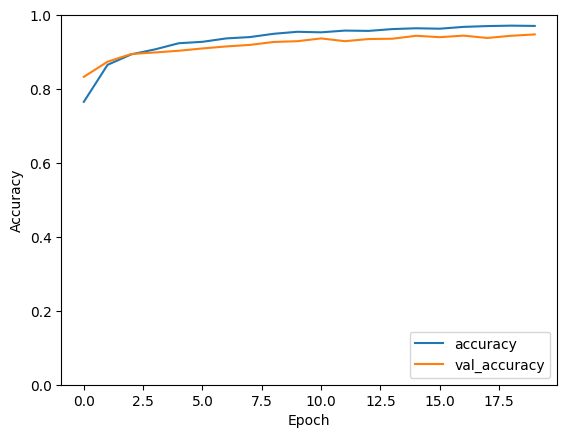

In [11]:
#Do not consider the timeframe
from sklearn.utils import shuffle
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = Sequential()
model.add(Dense(64, input_dim=14, activation='relu', use_bias = True))
model.add(Dense(32, activation='relu', use_bias = True))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size= 10, validation_split=0.2, verbose=1)

model.evaluate(X_test, y_test)
print("Accuracy", model.evaluate(X_test, y_test)[1])
print(model.predict(X_test))
print(y_test)

model.summary()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
#Print the importance of each feature
importance = model.get_weights()
print(importance)

[array([[-6.49499074e-02,  1.29781306e-01,  1.08355366e-01,
        -1.52681813e-01,  1.59077063e-01, -2.30794311e-01,
        -1.20500676e-01, -2.77641773e-01, -1.67439431e-01,
         1.38096586e-01, -3.27547252e-01, -3.02897424e-01,
         1.08872605e-02,  2.45722324e-01, -1.03073701e-01,
         2.75340937e-02,  2.17841178e-01, -1.56769201e-01,
         1.37656093e-01,  2.39316136e-01, -7.58271515e-02,
        -2.77081896e-02,  1.83079883e-01, -1.63636267e-01,
        -1.26030967e-01,  1.32660612e-01, -4.42546606e-03,
        -2.79306442e-01, -1.81342632e-01,  2.49070212e-01,
        -8.50581676e-02, -2.89085358e-01, -7.13794306e-02,
         5.93523085e-02, -1.73258036e-01,  1.88913047e-01,
         1.45742714e-01, -2.45229796e-01, -1.24860682e-01,
         1.70958564e-01,  2.93900110e-02, -7.62609243e-02,
        -1.46320546e-02, -2.75829196e-01, -4.88953888e-02,
        -3.63490492e-01, -1.23186164e-01, -1.09230049e-01,
        -1.79684699e-01, -3.16968679e-01,  1.68543532e-

In [31]:
print(y_train)

2631     1
107      0
10317    1
367      0
9029     1
        ..
5191     0
13418    0
5390     0
860      0
7270     1
Name: eyeDetection, Length: 11984, dtype: int64


In [ ]:
close = data[data['eyeDetection'] == 1]
open = data[data['eyeDetection'] == 0]

In [ ]:
close.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
188,0.014375,0.514817,0.623910,0.006414,0.668040,0.012665,0.007189,0.637205,0.015921,0.640261,0.632694,0.621311,0.031582,0.006360,1
189,0.014353,0.513240,0.623165,0.006413,0.667407,0.012659,0.007177,0.637135,0.015902,0.640184,0.633070,0.622117,0.031589,0.006351,1
190,0.014333,0.512320,0.622271,0.006405,0.666455,0.012642,0.007165,0.636146,0.015826,0.637571,0.630815,0.621384,0.031488,0.006333,1
191,0.014317,0.511269,0.622197,0.006392,0.665822,0.012618,0.007160,0.634381,0.015766,0.635113,0.629839,0.620213,0.031407,0.006329,1
192,0.014315,0.510940,0.622792,0.006393,0.666376,0.012621,0.007165,0.632545,0.015741,0.634575,0.630440,0.620506,0.031411,0.006332,1


In [ ]:
open.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,0.014000,0.513700,0.623388,0.006456,0.671921,0.012649,0.007223,0.638900,0.015894,0.635036,0.617211,0.611278,0.030438,0.006138,0
1,0.013985,0.513109,0.624060,0.006457,0.670653,0.012651,0.007224,0.638616,0.015851,0.633270,0.616685,0.611132,0.030417,0.006124,0
2,0.013995,0.513372,0.624282,0.006468,0.669861,0.012642,0.007223,0.637417,0.015840,0.632578,0.616535,0.611498,0.030391,0.006131,0
3,0.013998,0.514028,0.624432,0.006468,0.670891,0.012639,0.007224,0.637487,0.015876,0.634575,0.617136,0.612303,0.030414,0.006141,0
4,0.013990,0.514028,0.623836,0.006460,0.671524,0.012651,0.007222,0.637063,0.015851,0.635881,0.617437,0.612377,0.030417,0.006144,0


In [ ]:
close.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.0
mean,0.014070,0.513247,0.620003,0.006414,0.670603,0.012739,0.007182,0.635574,0.015967,0.634264,0.616312,0.611411,0.030417,0.006100,1.0
std,0.012027,0.004232,0.005481,0.000041,0.003492,0.000052,0.000060,0.002551,0.012003,0.002958,0.005829,0.004411,0.011829,0.000050,0.0
min,0.013579,0.500427,0.612209,0.006316,0.665663,0.011038,0.003678,0.628803,0.015614,0.586554,0.605411,0.322446,0.029613,0.005931,1.0
25%,0.013854,0.511072,0.618023,0.006392,0.668911,0.012711,0.007150,0.633887,0.015775,0.632578,0.614280,0.609740,0.030151,0.006071,1.0
50%,0.013899,0.512977,0.619662,0.006411,0.670099,0.012731,0.007176,0.635298,0.015813,0.633884,0.615858,0.611058,0.030246,0.006090,1.0
75%,0.013964,0.514948,0.621227,0.006430,0.671446,0.012754,0.007209,0.636851,0.015855,0.635574,0.617662,0.612670,0.030353,0.006118,1.0
max,1.000000,0.704776,1.000000,0.008429,0.842534,0.012987,0.007347,0.656690,1.000000,0.647715,1.000000,0.623875,1.000000,0.007016,1.0


In [ ]:
open.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.0
mean,0.013900,0.514193,0.619498,0.006537,0.670607,0.012866,0.007300,0.635370,0.015812,0.633723,0.615597,0.610839,0.030208,0.006225,0.0
std,0.000232,0.006920,0.007147,0.010934,0.006504,0.010865,0.010926,0.004918,0.000182,0.007191,0.005268,0.006919,0.000508,0.011084,0.0
min,0.003333,0.362704,0.151152,0.003818,0.322772,0.007635,0.006315,0.628733,0.005112,0.272147,0.479744,0.441450,0.000569,0.001908,0.0
25%,0.013834,0.511532,0.617649,0.006394,0.669149,0.012727,0.007158,0.633887,0.015776,0.632194,0.613905,0.609154,0.030135,0.006060,0.0
50%,0.013877,0.513437,0.619364,0.006413,0.670258,0.012741,0.007177,0.635016,0.015809,0.633500,0.615483,0.610472,0.030209,0.006080,0.0
75%,0.013922,0.515868,0.620407,0.006432,0.671367,0.012764,0.007194,0.636287,0.015840,0.634883,0.616985,0.611938,0.030286,0.006100,0.0
max,0.023925,1.000000,0.837519,1.000000,1.000000,1.000000,1.000000,1.000000,0.026892,1.000000,0.899586,1.000000,0.031737,1.000000,0.0


<Axes: title={'center': 'Close Eyes'}, ylabel='Frequency'>

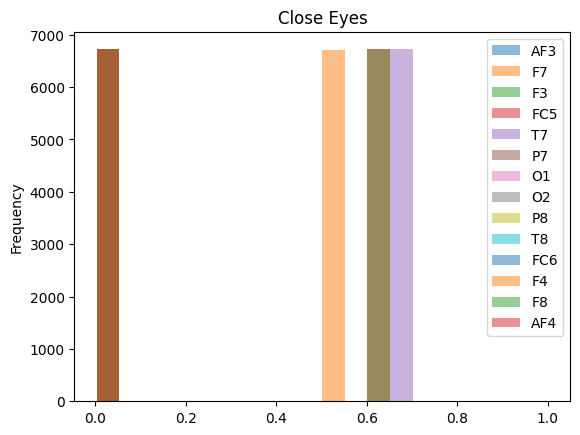

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
#What is n_estimators?
#n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the best number of trees for the specific use case.

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#What is RandomForestClassifier?
#Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Accuracy: 0.9289052069425902

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1674
           1       0.94      0.90      0.92      1322

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996

